In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly.express as px
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns = {
    "IRIS": str,
    "IPONDI": float,
    "AGED": int,
    "CS1": int
}
df_census = pd.read_csv("FD_INDCVI_2019.csv", sep = ";", dtype = columns, usecols = columns.keys())
df_census.head()

,AGED,CS1,IPONDI,IRIS
0,68,7,3.324481,010040101
1,33,6,2.957422,010040202
2,1,8,2.957422,010040202
3,30,6,2.957422,010040202
4,72,7,5.046771,ZZZZZZZZZ


In [3]:
df_census = df_census.rename(columns = {
    "IRIS": "iris_id",
    "IPONDI": "weight",
    "AGED": "age",
    "CS1": "csp"
})
df_census.head()

,age,csp,weight,iris_id
0,68,7,3.324481,010040101
1,33,6,2.957422,010040202
2,1,8,2.957422,010040202
3,30,6,2.957422,010040202
4,72,7,5.046771,ZZZZZZZZZ


In [4]:
df_age = df_census.groupby("age").size().reset_index(name = "count")
df_age

,age,count
0,0,10337
1,1,227153
2,2,229452
3,3,234656
4,4,238328
...,...,...
116,116,82
117,117,113
118,118,7
119,119,3


In [5]:
px.bar(df_age, x = "age", y = "count")

In [6]:
df_census["weight"].sum()

66984889.84164774

In [7]:
df_age_persons = df_census.groupby("age")["weight"].sum().reset_index()
df_age = pd.merge(df_age, df_age_persons, on = "age")

px.bar(df_age, x = "age", y = ["count", "weight"], barmode = "group")

In [8]:
df_age = df_census.groupby(["age", "csp"])["weight"].sum().reset_index()
df_age = df_age[df_age["csp"].isin([1, 3, 5])]
df_age["csp"] = df_age["csp"].astype(str)

px.bar(df_age, x = "age", y = "weight", color = "csp", barmode = "group")

In [9]:
df_census["department_id"] = df_census["iris_id"].str[:2]
df_census["municipality_id"] = df_census["iris_id"].str[:5]

In [10]:
df_census

,age,csp,weight,iris_id,department_id,municipality_id
0,68,7,3.324481,010040101,01,01004
1,33,6,2.957422,010040202,01,01004
2,1,8,2.957422,010040202,01,01004
3,30,6,2.957422,010040202,01,01004
4,72,7,5.046771,ZZZZZZZZZ,ZZ,ZZZZZ
...,...,...,...,...,...,...
19601259,40,5,4.999988,974220106,97,97422
19601260,59,4,0.999997,974220401,97,97422
19601261,41,8,4.361100,974220203,97,97422
19601262,74,7,4.361100,974220203,97,97422


In [11]:
habitat = df_census.groupby(["department_id", "municipality_id"]).size().reset_index(name="nbre_inhabitant")
habitat

,department_id,municipality_id,nbre_inhabitant
0,01,01004,5823
1,01,01033,5443
2,01,01034,1822
3,01,01053,15606
4,01,01143,1928
...,...,...,...
1916,97,97421,1434
1917,97,97422,31311
1918,97,97423,1396
1919,97,97424,1091


In [12]:
habitat2=habitat[habitat['municipality_id']>'75000']
habitat2

,department_id,municipality_id,nbre_inhabitant
1307,75,75101,6559
1308,75,75102,8547
1309,75,75103,13620
1310,75,75104,11209
1311,75,75105,22340
...,...,...,...
1916,97,97421,1434
1917,97,97422,31311
1918,97,97423,1396
1919,97,97424,1091


In [13]:
habitat_plus_10000 = habitat[habitat['nbre_inhabitant'] > 10000]

habitat_plus_10000

,department_id,municipality_id,nbre_inhabitant
3,01,01053,15606
22,02,02691,20617
23,02,02722,10948
31,03,03185,13267
42,05,05061,15962
...,...,...,...
1910,97,97415,41037
1911,97,97416,33154
1913,97,97418,13406
1917,97,97422,31311


In [14]:
habitat_dep_69 = habitat_plus_10000[habitat_plus_10000['department_id'] == '69']

habitat_dep_69

,department_id,municipality_id,nbre_inhabitant
1185,69,69029,15570
1186,69,69034,16676
1200,69,69149,10646
1209,69,69256,18935
1210,69,69259,25661
1211,69,69264,14216
1212,69,69266,55515
1215,69,69275,11299
1219,69,69282,12926
1221,69,69286,11574


In [15]:
# Filtering the DataFrame for department 13
department_69_df = df_census[df_census["department_id"] == "69"]

# Exporting the filtered DataFrame to a CSV file

#department_69_df.to_csv("C:/Users/aders/Holer/department_69_data.csv", index=False)

In [16]:
department_69_df.shape

(518084, 6)

# Ex 1.1


We have selected the 1st arrondissement of Lyon, situated in the department 69.

This municipality shares borders with the following:

- Lyon 2nd arrondissement
- Lyon 4th arrondissement
- Lyon 5th arrondissement
- Lyon 6th arrondissement
- Lyon 9th arrondissement


We have chosen this municipality for the following reasons:

- It boasts a population of 11,793 inhabitants, as evidenced in the provided code.
- The municipality has eight neighboring municipalities, fulfilling the criterion of having more than two neighboring municipalities.
- Each of its neighboring municipalities has a population exceeding 10,000 inhabitants, as per the code demonstration.

In [17]:
df = pd.read_csv("department_69_data.csv", sep = ",")
df

,age,csp,weight,iris_id,department_id,municipality_id
0,70,7,5.311858,690100101,69,69010
1,31,5,5.311858,690100102,69,69010
2,29,3,5.152903,690100101,69,69010
3,27,4,5.152903,690100101,69,69010
4,23,4,5.311858,690100101,69,69010
...,...,...,...,...,...,...
518079,26,3,4.999997,693890402,69,69389
518080,21,8,4.999997,693890402,69,69389
518081,25,4,4.999997,693890402,69,69389
518082,19,8,5.000029,693850504,69,69385


In [18]:
df.query('municipality_id == 69381')["weight"].sum()

29647.999720400003

In [19]:
df[df['municipality_id'].isin([69382,69384, 69385, 69386,69389])].groupby('municipality_id')['weight'].sum()

municipality_id
69382    31297.999838
69384    36051.482779
69385    49670.000492
69386    52850.000382
69389    51976.998964
Name: weight, dtype: float64

# Map

In [20]:
df_iris = gpd.read_file("C:/Users/aders/Holer/CONTOURS-IRIS_2-1__SHP__FRA_2021-01-01/CONTOURS-IRIS/1_DONNEES_LIVRAISON_2021-06-00217/CONTOURS-IRIS_2-1_SHP_LAMB93_FXX-2021/CONTOURS-IRIS.shp")
df_iris.head()

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
0,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((498083.500 6747517.400, 498128.000 6..."
1,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((685753.100 6868612.900, 685757.700 6..."
2,51426,Péas,0000,514260000,Péas,Z,"POLYGON ((759067.200 6849592.700, 758778.600 6..."
3,81199,Padiès,0000,811990000,Padiès,Z,"POLYGON ((651482.800 6326359.400, 651475.600 6..."
4,59225,Feignies,0102,592250102,Sud,H,"POLYGON ((767673.500 7022290.500, 767647.200 7..."


In [21]:
df_iris.head()

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
0,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((498083.500 6747517.400, 498128.000 6..."
1,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((685753.100 6868612.900, 685757.700 6..."
2,51426,Péas,0000,514260000,Péas,Z,"POLYGON ((759067.200 6849592.700, 758778.600 6..."
3,81199,Padiès,0000,811990000,Padiès,Z,"POLYGON ((651482.800 6326359.400, 651475.600 6..."
4,59225,Feignies,0102,592250102,Sud,H,"POLYGON ((767673.500 7022290.500, 767647.200 7..."


In [22]:
df_iris = df_iris[["INSEE_COM", "CODE_IRIS", "geometry"]].rename(columns = {
    "INSEE_COM": "municipality_id", "CODE_IRIS": "iris_id"
})

In [23]:
df_iris

,municipality_id,iris_id,geometry
0,72191,721910000,"POLYGON ((498083.500 6747517.400, 498128.000 6..."
1,77248,772480000,"POLYGON ((685753.100 6868612.900, 685757.700 6..."
2,51426,514260000,"POLYGON ((759067.200 6849592.700, 758778.600 6..."
3,81199,811990000,"POLYGON ((651482.800 6326359.400, 651475.600 6..."
4,59225,592250102,"POLYGON ((767673.500 7022290.500, 767647.200 7..."
...,...,...,...
48584,71073,710730102,"POLYGON ((831995.400 6646411.800, 831977.700 6..."
48585,38545,385450101,"POLYGON ((912429.500 6439712.700, 912342.600 6..."
48586,74063,740630000,"POLYGON ((991081.900 6580596.800, 991205.600 6..."
48587,95101,951010000,"POLYGON ((603615.500 6895980.900, 603612.300 6..."


In [24]:
df_municipalities = df_iris.dissolve("municipality_id").reset_index()

In [25]:
df_municipalities

,municipality_id,geometry,iris_id
0,01001,"POLYGON ((851129.600 6563369.200, 851107.500 6...",010010000
1,01002,"POLYGON ((889113.200 6549307.800, 889111.600 6...",010020000
2,01004,"POLYGON ((882936.400 6541364.300, 882932.900 6...",010040102
3,01005,"POLYGON ((846758.000 6544007.000, 846755.000 6...",010050000
4,01006,"POLYGON ((900682.500 6518954.000, 900466.600 6...",010060000
...,...,...,...
34873,95676,"POLYGON ((608000.000 6886602.000, 607973.100 6...",956760000
34874,95678,"POLYGON ((645264.100 6888152.200, 645279.800 6...",956780000
34875,95680,"POLYGON ((656141.900 6877322.900, 656091.200 6...",956800111
34876,95682,"POLYGON ((656543.000 6887123.500, 656421.900 6...",956820000


In [26]:
df_municipalities["department_id"] = df_municipalities["municipality_id"].str[:2]
df_municipalities

,municipality_id,geometry,iris_id,department_id
0,01001,"POLYGON ((851129.600 6563369.200, 851107.500 6...",010010000,01
1,01002,"POLYGON ((889113.200 6549307.800, 889111.600 6...",010020000,01
2,01004,"POLYGON ((882936.400 6541364.300, 882932.900 6...",010040102,01
3,01005,"POLYGON ((846758.000 6544007.000, 846755.000 6...",010050000,01
4,01006,"POLYGON ((900682.500 6518954.000, 900466.600 6...",010060000,01
...,...,...,...,...
34873,95676,"POLYGON ((608000.000 6886602.000, 607973.100 6...",956760000,95
34874,95678,"POLYGON ((645264.100 6888152.200, 645279.800 6...",956780000,95
34875,95680,"POLYGON ((656141.900 6877322.900, 656091.200 6...",956800111,95
34876,95682,"POLYGON ((656543.000 6887123.500, 656421.900 6...",956820000,95


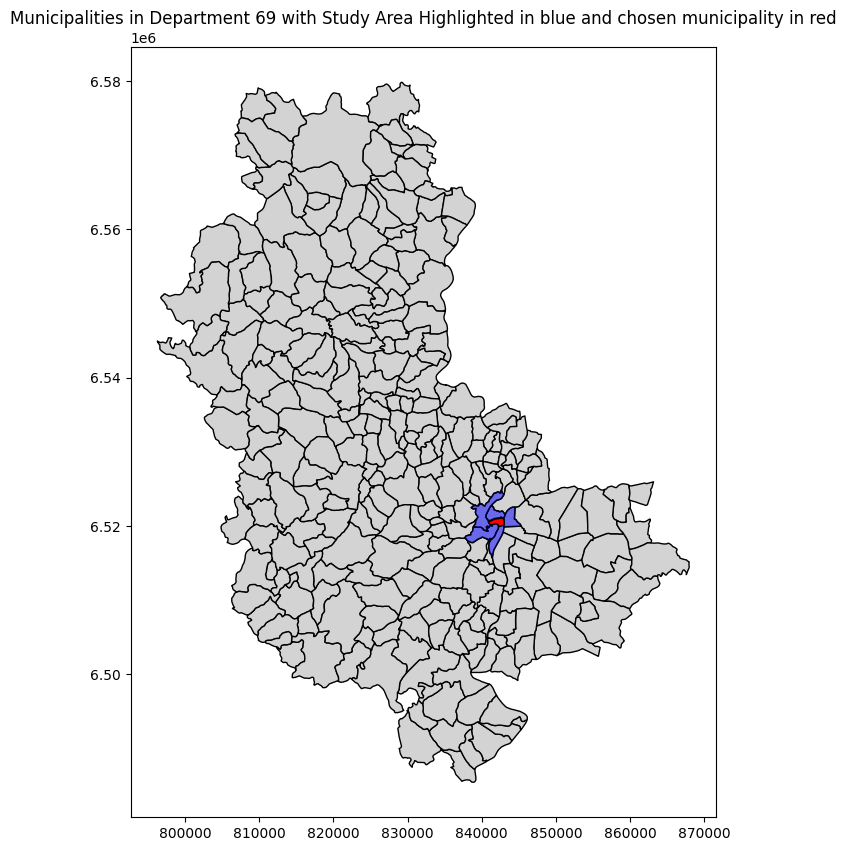

In [27]:
selected_department_id = '69'
selected_municipality_id = '69381'
neighboring_municipalities_ids = ['69382', '69384', '69385', '69386', '69389']
df_selected_department = df_municipalities[df_municipalities['department_id'] == selected_department_id]

# Further filter the dataframe to include only the selected municipality and its neighbors
study_area_municipalities_ids = [selected_municipality_id] + neighboring_municipalities_ids
df_study_area = df_selected_department[df_selected_department['municipality_id'].isin(study_area_municipalities_ids)]

# Create a plot with a specified size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all municipalities in the selected department
df_selected_department.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot the study area (selected municipality and its neighbors)
df_study_area.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

# Highlight the selected municipality in the plot
df_municipalities[df_municipalities['municipality_id'] == selected_municipality_id].plot(ax=ax, color='red', edgecolor='black')

# Set the title of the plot
ax.set_title(f'Municipalities in Department {selected_department_id} with Study Area Highlighted in blue and chosen municipality in red')

# Display the plot
plt.show()


### The map  shows the department in which the municipality is located and all municipalities in the department. It highlights the “study area”, i.e., the selected municipality and all neighbouring municipalities that highlights the selected municipality.

In [28]:
df_study_area

,municipality_id,geometry,iris_id,department_id
27273,69381,"POLYGON ((842136.800 6520220.200, 842085.300 6...",693810501,69
27274,69382,"POLYGON ((842170.700 6517714.100, 842035.300 6...",693820501,69
27276,69384,"POLYGON ((842184.200 6521046.200, 842154.600 6...",693840402,69
27277,69385,"POLYGON ((840594.000 6518286.300, 840528.900 6...",693850202,69
27278,69386,"POLYGON ((843389.600 6519894.800, 843302.200 6...",693860201,69
27281,69389,"POLYGON ((840253.300 6519501.900, 840246.600 6...",693890502,69


# EX1.2

In [29]:
df

,age,csp,weight,iris_id,department_id,municipality_id
0,70,7,5.311858,690100101,69,69010
1,31,5,5.311858,690100102,69,69010
2,29,3,5.152903,690100101,69,69010
3,27,4,5.152903,690100101,69,69010
4,23,4,5.311858,690100101,69,69010
...,...,...,...,...,...,...
518079,26,3,4.999997,693890402,69,69389
518080,21,8,4.999997,693890402,69,69389
518081,25,4,4.999997,693890402,69,69389
518082,19,8,5.000029,693850504,69,69385


In [30]:
study_area_list = [69381,69382,69384, 69385, 69386,69389]

In [31]:

# Filter the DataFrame to include only municipalities in the study area
df_Study_Area= df[df['municipality_id'].isin(study_area_list)]

# Group by municipality_id and aggregate sum of weights and count of data samples
result = df_Study_Area.groupby('municipality_id').agg(Sum_of_weights=('weight', 'sum'), number_of_data_samples=('municipality_id', 'count')).reset_index()

# Display the result
print(result)

   municipality_id  Sum_of_weights  number_of_data_samples
0            69381    29647.999720                   11793
1            69382    31297.999838                   11920
2            69384    36051.482779                   14122
3            69385    49670.000492                   18651
4            69386    52850.000382                   20423
5            69389    51976.998964                   18576


In [32]:

import seaborn as sns

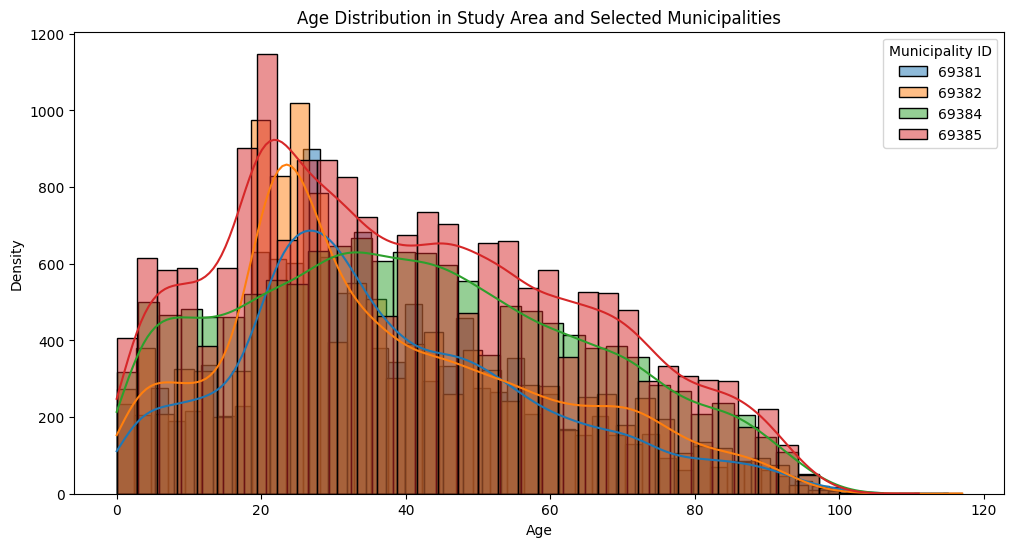

In [33]:
plt.figure(figsize=(12, 6))
for municipality_id in study_area_list[:4]:  # Plotting for the first three municipalities
    sns.histplot(data=df_Study_Area[df_Study_Area['municipality_id'] == municipality_id], x='age', kde=True, label=municipality_id)
plt.title('Age Distribution in Study Area and Selected Municipalities')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Municipality ID')
plt.show()

There is a noticeable difference in the age distribution among the various municipalities in the study area. Across all municipalities, there is a lower proportion of individuals aged 0 to 18 years old. However, the 5th and 2nd arrondissements exhibit the highest proportion of individuals aged 0 to 20 years old.

For individuals aged 20 to 40, the proportion decreases across all municipalities, with the 5th arrondissement maintaining the highest number.

In the age group of 40 to 60 years old, all municipalities have approximately between 400 and 200 individuals.

Finally, in the age range of 80 to 100 years old, all municipalities have a negligible number of individuals, ranging from 0 to 200

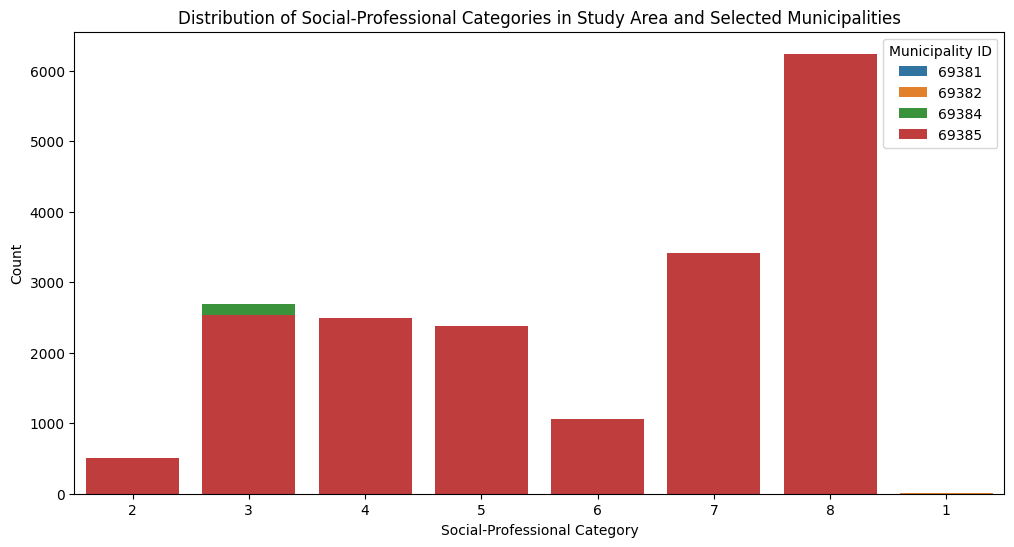

In [34]:
plt.figure(figsize=(12, 6))
for municipality_id in study_area_list[:4]:  # Plotting for the first three municipalities
    sns.countplot(data=df_Study_Area[df_Study_Area['municipality_id'] == municipality_id], x='csp', label=municipality_id)
plt.title('Distribution of Social-Professional Categories in Study Area and Selected Municipalities')
plt.xlabel('Social-Professional Category')
plt.ylabel('Count')
plt.legend(title='Municipality ID')
plt.show()

In [35]:
# Calculate age distribution for the whole dataset
total_csp_distribution = df_Study_Area.groupby("csp")["weight"].sum().reset_index()
total_csp_distribution["municipality_id"] = "Total"
total_age_distribution = df_Study_Area.groupby("age")["weight"].sum().reset_index()
total_age_distribution["municipality_id"] = "Total"
# Filter df_age for specific municipality_ids
df_csp = df_Study_Area.groupby(["csp", "municipality_id"])["weight"].sum().reset_index()
df_csp = df_csp.replace({
    1: "Agriculteurs",
    2: "Artisans",
    3: "Cadres",
    4: "Intermédiaires",
    5: "Employés",
    6: "Ouvriers",
    7: "Retraités",
    8: "Autres"
})
# Concatenate total_age_distribution and df_age_filtered
combined_df = pd.concat([df_csp, total_age_distribution], ignore_index=True)

# Convert municipality_id to string
combined_df["municipality_id"] = combined_df["municipality_id"].astype(str)

# Get unique municipality_ids
municipality_ids = combined_df["municipality_id"].unique()

# Plot each municipality_id separately
for municipality_id in municipality_ids:
    # Filter DataFrame for the current municipality_id
    df_filtered = combined_df[combined_df["municipality_id"] == municipality_id]
    
    # Plot the DataFrame
    fig = px.bar(df_filtered, x="csp", y="weight", color="municipality_id", barmode="group")
    
    # Update layout to adjust figure size
    fig.update_layout(
        title=f"CSP Distribution for Municipality {municipality_id}",
        width=800,  # Width of the plot
        height=600,  # Height of the plot
    )
    
    # Show the plot
    fig.show()

We observe slight variations in the CSP (Social Categories and Professions) distribution among municipalities. For instance, the 6th arrondissement exhibits a higher number of individuals in the 'cadre' category compared to other municipalities, while the 5th arrondissement has the highest number of individuals categorized as 'Retraite' (retired) compared to others

# 1.3

In [36]:
df_population = pd.read_csv("base-ic-evol-struct-pop-2019.CSV", sep = ";", nrows = 20)
df_population

,IRIS,COM,TYP_IRIS,MODIF_IRIS,LAB_IRIS,P19_POP,P19_POP0002,P19_POP0305,P19_POP0610,P19_POP1117,...,C19_F15P_CS4,C19_F15P_CS5,C19_F15P_CS6,C19_F15P_CS7,C19_F15P_CS8,P19_POP_FR,P19_POP_ETR,P19_POP_IMM,P19_PMEN,P19_PHORMEN
0,10010000,1001,Z,0,5,779.000000,28.717996,17.704186,56.118237,88.707423,...,51.660136,85.506573,30.706106,74.014043,15.282114,770.764925,8.235075,20.489890,779.000000,0.000000
1,10020000,1002,Z,0,5,256.000000,14.822643,10.649265,14.954810,25.657176,...,21.129095,26.532030,0.000000,20.804745,0.000000,253.880636,2.119364,3.159602,256.000000,0.000000
2,10040101,1004,H,0,1,1866.820612,81.762602,47.104967,100.705691,139.733038,...,97.002069,230.709482,57.381411,173.435664,188.940291,1581.546546,285.274066,254.016701,1503.829647,362.990965
3,10040102,1004,H,0,1,3597.838556,168.897927,119.186603,198.365404,259.072890,...,227.534831,393.985009,153.027649,395.418257,324.027792,3147.417422,450.421134,561.857429,3597.838556,0.000000
4,10040201,1004,H,0,1,4134.477890,167.871616,174.765320,272.922347,394.708508,...,251.065974,374.705891,192.484961,512.421938,366.036586,3774.171377,360.306514,418.569299,4046.480081,87.997810
5,10040202,1004,H,0,1,4534.862942,149.032630,182.900634,328.935646,431.321937,...,373.780995,389.637137,139.310148,483.551623,345.786401,4358.626449,176.236493,344.727641,4476.864386,57.998556
6,10050000,1005,Z,0,5,1751.000000,61.904040,67.799663,122.825477,154.268799,...,112.999439,245.650954,19.652076,181.781706,78.608305,1718.574074,32.425926,71.730079,1751.000000,0.000000
7,10060000,1006,Z,0,5,112.000000,3.054545,1.018182,3.054545,8.145455,...,10.181818,10.181818,5.090909,15.272727,0.000000,104.872727,7.127273,8.145455,112.000000,0.000000
8,10070000,1007,Z,0,5,2800.000000,116.000000,112.000000,222.000000,281.000000,...,230.000000,315.000000,70.000000,220.000000,175.000000,2744.000000,56.000000,101.000000,2790.000000,10.000000
9,10080000,1008,Z,0,5,762.000000,21.095829,28.067781,48.114928,69.157812,...,70.322093,85.929791,25.334862,66.146506,25.267737,743.890882,18.109118,25.181515,762.000000,0.000000


In [37]:
df_population = pd.read_csv("base-ic-evol-struct-pop-2019.CSV", sep = ";", dtype = {
    "COM": "str"
}, usecols = ["COM", "P19_POP"] + ["C19_POP15P_CS{}".format(k) for k in range(1,9)])

for k in range(1, 9):
    df_population["csp_{}".format(k)] = df_population["C19_POP15P_CS{}".format(k)]
    
df_population = df_population[["COM", "P19_POP"] + ["csp_{}".format(k) for k in range(1,9)]]
df_population.columns = ["municipality_id", "population"] + ["csp_{}".format(k) for k in range(1,9)]
df_population = df_population.groupby("municipality_id").sum().reset_index()

In [38]:
df_population

,municipality_id,population,csp_1,csp_2,csp_3,csp_4,csp_5,csp_6,csp_7,csp_8
0,01001,779.0,15.565978,19.822632,76.142088,98.357964,100.516361,126.843164,152.541469,29.616393
1,01002,256.0,0.000000,21.265503,15.927908,26.460181,42.135589,10.596822,67.296631,21.726261
2,01004,14134.0,2.762881,327.166403,784.225660,1890.243930,1891.133347,2001.750487,2763.422684,1848.127141
3,01005,1751.0,4.913019,112.999439,112.999439,221.085859,294.781145,186.694725,338.998316,117.912458
4,01006,112.0,0.000000,0.000000,5.090909,25.454545,15.272727,15.272727,25.454545,5.090909
...,...,...,...,...,...,...,...,...,...,...
34985,97420,24065.0,132.645899,600.979456,760.699348,2486.081710,3999.997623,2624.710721,2440.443091,5311.935549
34986,97421,7136.0,205.000000,145.000000,60.000000,345.000000,920.000000,1135.000000,660.000000,1925.000000
34987,97422,79824.0,1105.911121,2429.827432,2229.743854,7022.017452,12993.475117,8175.812588,10539.247496,17369.412753
34988,97423,7015.0,60.509132,156.315256,196.654677,579.879177,1356.413032,1025.279554,675.685302,1527.855571


In [39]:
new_df_population_study_area = df_population[df_population['municipality_id'].isin(['69381', '69382', '69384', '69385', '69386', '69389'])]
new_df_population_study_area

,municipality_id,population,csp_1,csp_2,csp_3,csp_4,csp_5,csp_6,csp_7,csp_8
27273,69381,29641.0,0.000000,1032.629820,6817.008895,5062.492550,3370.798972,1182.950966,3218.291923,5084.368279
27274,69382,31303.0,12.174949,1052.524904,6036.613083,4206.633366,3062.858380,1100.523987,4504.393734,6921.526328
27276,69384,36064.0,0.000000,1143.426318,7007.517058,5587.987947,3597.477402,1410.663235,6872.635607,4534.118884
27277,69385,49664.0,2.129274,1320.048941,6757.380207,6594.686507,5955.071965,2541.129030,9885.425116,9102.908265
27278,69386,52862.0,6.720533,1750.685993,12256.503396,7178.257638,4470.263834,1383.730357,8983.419892,8939.511994
27281,69389,51983.0,0.000000,963.536682,6420.581888,6899.270924,6944.033005,4269.724129,7935.839755,9080.443351


In [40]:
import plotly.graph_objs as go
from plotly.offline import plot

# Grouping by municipality_id and summing up the population
population_by_municipality = new_df_population_study_area.groupby('municipality_id')['population'].sum()

# Extracting municipality ids and corresponding population
municipality_ids = population_by_municipality.index
population_values = population_by_municipality.values

# Creating a bar plot trace
trace = go.Bar(
    x=municipality_ids,
    y=population_values,
    marker=dict(color='skyblue')
)

# Creating layout
layout = go.Layout(
    title='Population in Each Municipality',
    xaxis=dict(title='Municipality ID'),
    yaxis=dict(title='Population'),
    bargap=0.2,
    plot_bgcolor='rgba(0,0,0,0)',
    width=800,
    height=600
)

# Combining trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Plotting the interactive bar plot
plot(fig, filename='population_bar_plot.html')


'population_bar_plot.html'

In [41]:
#pip install folium

In [42]:

df_merged = df_study_area.merge(new_df_population_study_area, on='municipality_id')


In [43]:
df_merged

,municipality_id,geometry,iris_id,department_id,population,csp_1,csp_2,csp_3,csp_4,csp_5,csp_6,csp_7,csp_8
0,69381,"POLYGON ((842136.800 6520220.200, 842085.300 6...",693810501,69,29641.0,0.000000,1032.629820,6817.008895,5062.492550,3370.798972,1182.950966,3218.291923,5084.368279
1,69382,"POLYGON ((842170.700 6517714.100, 842035.300 6...",693820501,69,31303.0,12.174949,1052.524904,6036.613083,4206.633366,3062.858380,1100.523987,4504.393734,6921.526328
2,69384,"POLYGON ((842184.200 6521046.200, 842154.600 6...",693840402,69,36064.0,0.000000,1143.426318,7007.517058,5587.987947,3597.477402,1410.663235,6872.635607,4534.118884
3,69385,"POLYGON ((840594.000 6518286.300, 840528.900 6...",693850202,69,49664.0,2.129274,1320.048941,6757.380207,6594.686507,5955.071965,2541.129030,9885.425116,9102.908265
4,69386,"POLYGON ((843389.600 6519894.800, 843302.200 6...",693860201,69,52862.0,6.720533,1750.685993,12256.503396,7178.257638,4470.263834,1383.730357,8983.419892,8939.511994
5,69389,"POLYGON ((840253.300 6519501.900, 840246.600 6...",693890502,69,51983.0,0.000000,963.536682,6420.581888,6899.270924,6944.033005,4269.724129,7935.839755,9080.443351


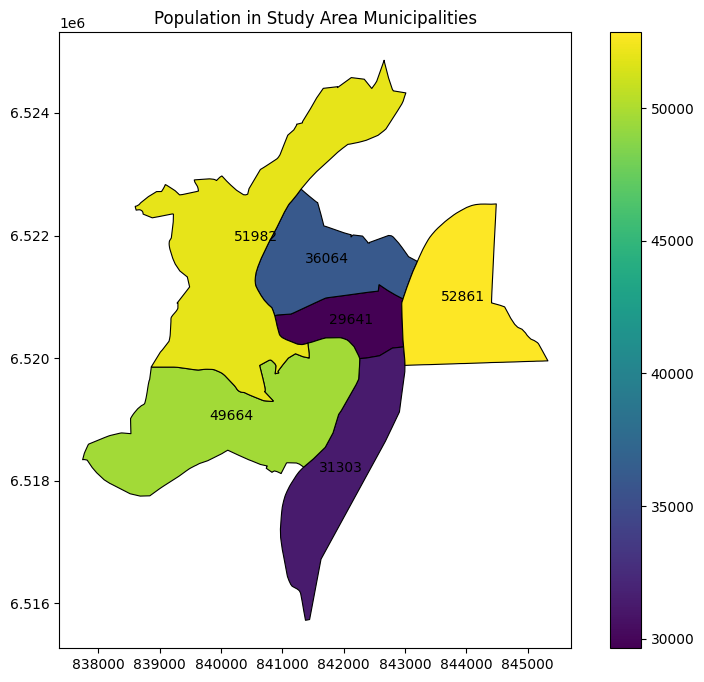

In [44]:
# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
df_merged.plot(column='population', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='black', legend=True)

# Annotate each municipality with its population
for idx, row in df_merged.iterrows():
    ax.annotate(text=int(row['population']),
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(-14.5, -1),  # offset text slightly
                textcoords="offset points",
                fontsize=10,
                color="black")

ax.set_title('Population in Study Area Municipalities')
plt.show()


In [45]:
#pip install mplleaflet

In [46]:
df_merged

,municipality_id,geometry,iris_id,department_id,population,csp_1,csp_2,csp_3,csp_4,csp_5,csp_6,csp_7,csp_8
0,69381,"POLYGON ((842136.800 6520220.200, 842085.300 6...",693810501,69,29641.0,0.000000,1032.629820,6817.008895,5062.492550,3370.798972,1182.950966,3218.291923,5084.368279
1,69382,"POLYGON ((842170.700 6517714.100, 842035.300 6...",693820501,69,31303.0,12.174949,1052.524904,6036.613083,4206.633366,3062.858380,1100.523987,4504.393734,6921.526328
2,69384,"POLYGON ((842184.200 6521046.200, 842154.600 6...",693840402,69,36064.0,0.000000,1143.426318,7007.517058,5587.987947,3597.477402,1410.663235,6872.635607,4534.118884
3,69385,"POLYGON ((840594.000 6518286.300, 840528.900 6...",693850202,69,49664.0,2.129274,1320.048941,6757.380207,6594.686507,5955.071965,2541.129030,9885.425116,9102.908265
4,69386,"POLYGON ((843389.600 6519894.800, 843302.200 6...",693860201,69,52862.0,6.720533,1750.685993,12256.503396,7178.257638,4470.263834,1383.730357,8983.419892,8939.511994
5,69389,"POLYGON ((840253.300 6519501.900, 840246.600 6...",693890502,69,51983.0,0.000000,963.536682,6420.581888,6899.270924,6944.033005,4269.724129,7935.839755,9080.443351


In [47]:
df_employment = pd.read_csv("etablissements-et-effectifs-salaries-au-niveau-commune-x-ape-last.csv", sep = ";", 
    usecols = ["Code commune", "Effectifs salariés 2019"], dtype = { "Code commune": str })

df_employment = df_employment.rename(columns = {
    "Code commune": "municipality_id",
    "Effectifs salariés 2019": "employment"
})

df_employment = df_employment.groupby("municipality_id").sum().reset_index()

df_employment
df_employment_Study_Area = df_employment[df_employment['municipality_id'].isin(['69381', '69382', '69384', '69385', '69386', '69389'])]
df_employment_Study_Area

,municipality_id,employment
26094,69381,9906.0
26095,69382,37666.0
26097,69384,6411.0
26098,69385,9370.0
26099,69386,31674.0
26102,69389,29017.0


Step 3: Create a bar plot indicating the number of employees in each municipality

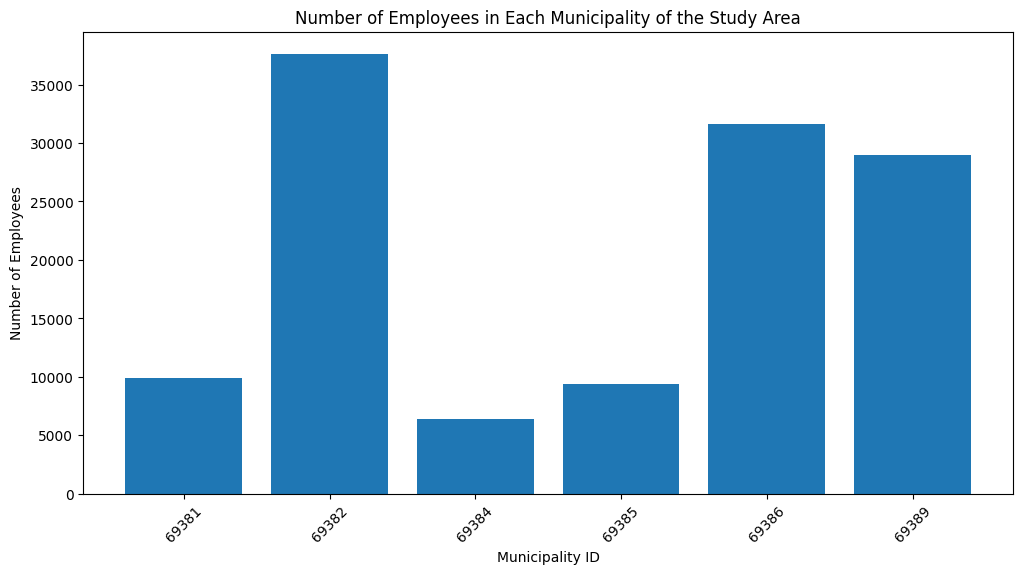

<Axes: >

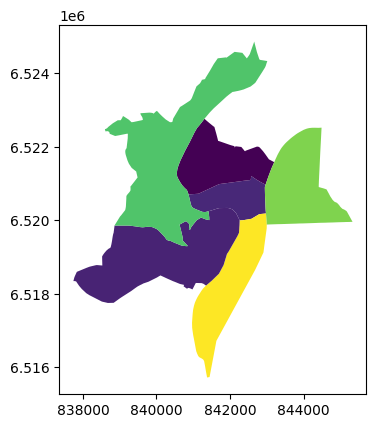

In [48]:
plt.figure(figsize=(12, 6))
plt.bar(df_employment_Study_Area['municipality_id'], df_employment_Study_Area['employment'])
plt.title('Number of Employees in Each Municipality of the Study Area')
plt.xlabel('Municipality ID')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()
gdf_employment = df_study_area.merge(df_employment_Study_Area, on='municipality_id')
gdf_employment
gdf_employment.plot("employment")

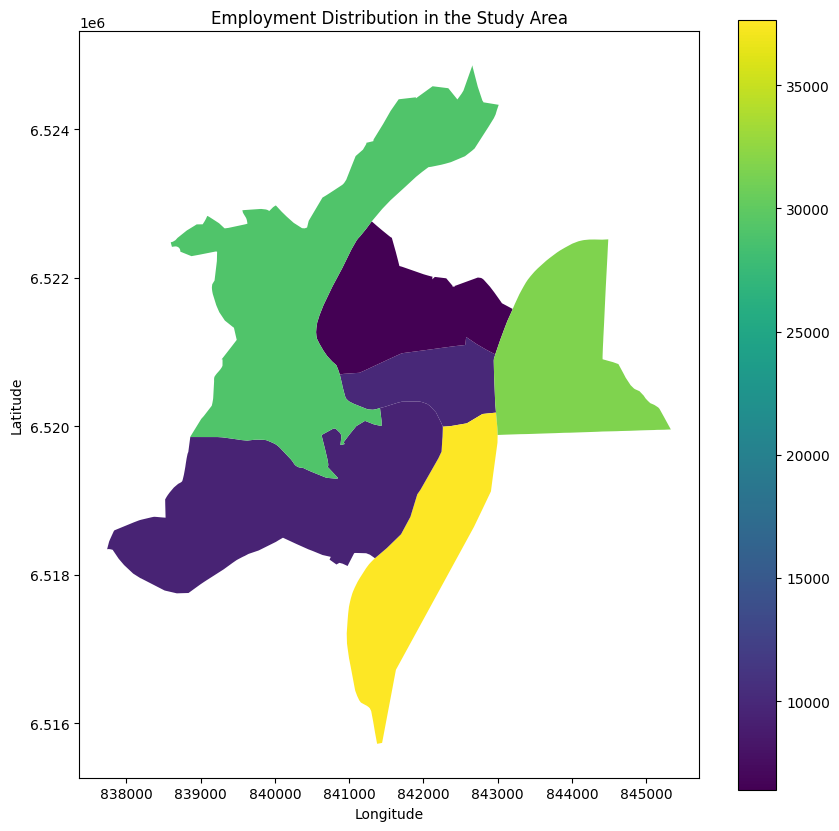

In [49]:
#Plot the map
gdf_employment.plot(column='employment', figsize=(10, 10), legend=True)
plt.title('Employment Distribution in the Study Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
total_population = new_df_population_study_area['population'].sum()

In [50]:
new_df_population_study_area

,municipality_id,population,csp_1,csp_2,csp_3,csp_4,csp_5,csp_6,csp_7,csp_8
27273,69381,29641.0,0.000000,1032.629820,6817.008895,5062.492550,3370.798972,1182.950966,3218.291923,5084.368279
27274,69382,31303.0,12.174949,1052.524904,6036.613083,4206.633366,3062.858380,1100.523987,4504.393734,6921.526328
27276,69384,36064.0,0.000000,1143.426318,7007.517058,5587.987947,3597.477402,1410.663235,6872.635607,4534.118884
27277,69385,49664.0,2.129274,1320.048941,6757.380207,6594.686507,5955.071965,2541.129030,9885.425116,9102.908265
27278,69386,52862.0,6.720533,1750.685993,12256.503396,7178.257638,4470.263834,1383.730357,8983.419892,8939.511994
27281,69389,51983.0,0.000000,963.536682,6420.581888,6899.270924,6944.033005,4269.724129,7935.839755,9080.443351


In [51]:
df_employment_Study_Area

,municipality_id,employment
26094,69381,9906.0
26095,69382,37666.0
26097,69384,6411.0
26098,69385,9370.0
26099,69386,31674.0
26102,69389,29017.0


In [52]:
#Calculate total number of employees
total_employees = df_employment_Study_Area['employment'].sum()

#Report the totals
print("Total number of inhabitants in the study area:", total_population)
print("Total number of employees in the study area:", total_employees)

Total number of inhabitants in the study area: 251517.00000000003
Total number of employees in the study area: 124044.0


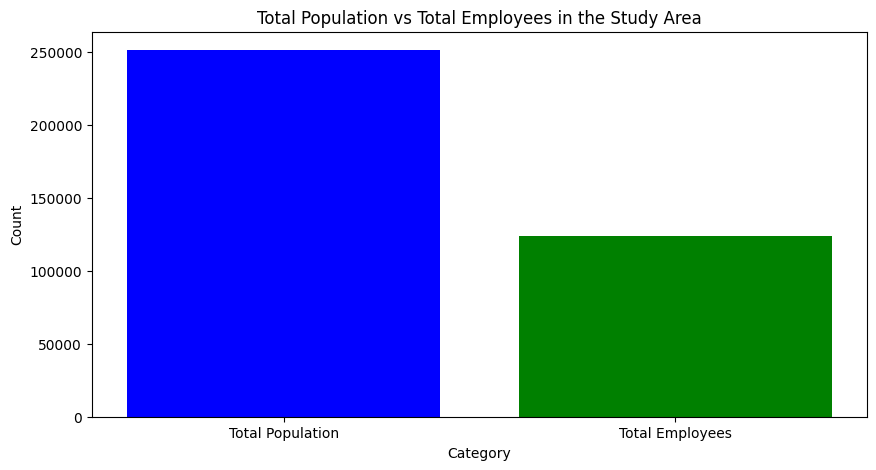

In [53]:
#Plot bar plot for total population and employees
plt.figure(figsize=(10, 5))
plt.bar(['Total Population', 'Total Employees'], [total_population, total_employees], color=['blue', 'green'])
plt.title('Total Population vs Total Employees in the Study Area')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 2.1

Total trips generated in the study area: 149116.40673721762


C:\Users\aders\AppData\Local\Temp\ipykernel_14628\1268463765.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



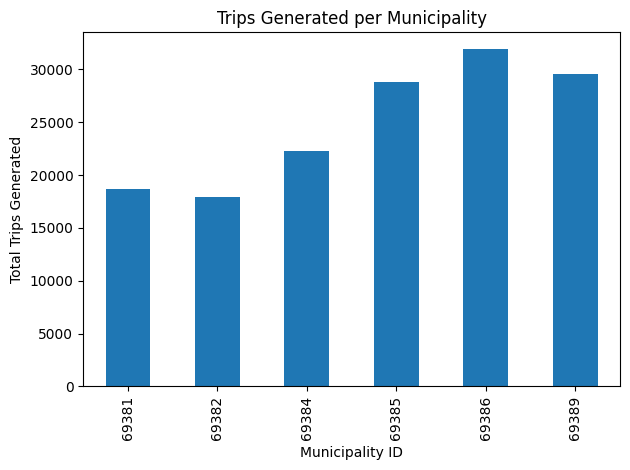

In [54]:
betas = {
    'beta0': 27.244,
    'csp_1': 0.319,
    'csp_2': 0.994,
    'csp_3': 0.863,
    'csp_4': 0.990,
    'csp_5': 0.780,
    'csp_6': 0.708,
    'csp_7': 0.120,
    'csp_8': -0.073
}

def calculate_trips(row):
    trip_sum = sum(beta * row.get(f'csp_{i+1}', 0) for i, beta in enumerate(betas.values()) if i != 0)
    trips = max(betas['beta0'] + trip_sum, 0)
    
    return trips

new_df_population_study_area['total_trips'] = new_df_population_study_area.apply(calculate_trips, axis=1)
total_trips_generated = new_df_population_study_area['total_trips'].sum()
print(f"Total trips generated in the study area: {total_trips_generated}")

# Plot the results
new_df_population_study_area.plot(kind='bar', x='municipality_id', y='total_trips', legend=False)
plt.xlabel('Municipality ID')
plt.ylabel('Total Trips Generated')
plt.title('Trips Generated per Municipality')
plt.tight_layout()
plt.show()

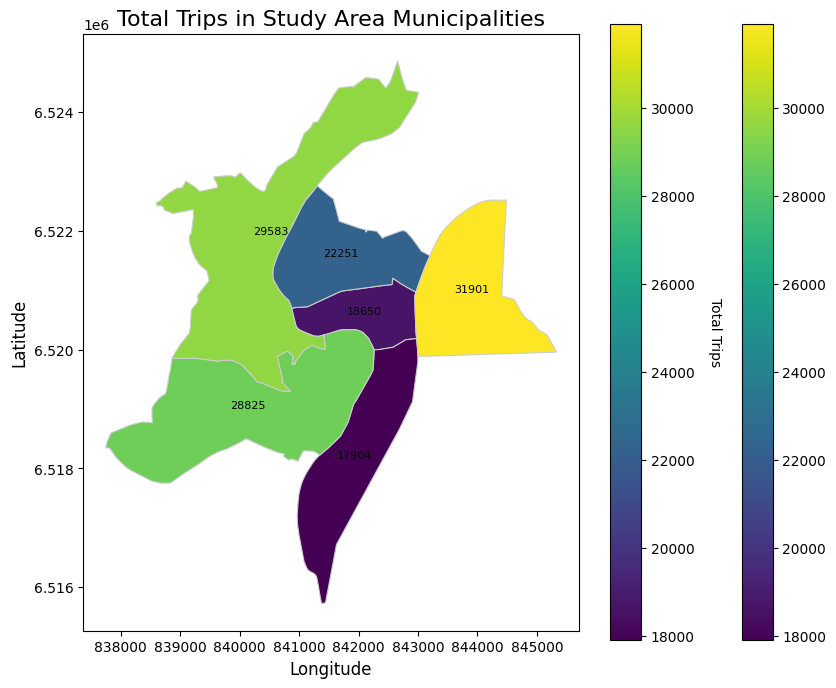

In [55]:
import matplotlib.pyplot as plt
df_merged = df_study_area.merge(new_df_population_study_area, on='municipality_id')
# Assuming 'total_trips' is in the range of 0 to some maximum value for better color scaling
vmin, vmax = df_merged['total_trips'].min(), df_merged['total_trips'].max()

fig, ax = plt.subplots(figsize=(10, 8))

# Plotting the map
df_merged.plot(column='total_trips', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)

# Adding annotations
for idx, row in df_merged.iterrows():
    ax.annotate(text=str(int(row['total_trips'])),
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(0, 0),  # Let matplotlib decide the offset automatically
                textcoords="offset points",
                fontsize=8,
                color="black",
                ha='center')  # Center align the text

# Customizing plot
ax.set_title('Total Trips in Study Area Municipalities', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Adding colorbar with label
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Fake up the array of the scalar mappable
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Total Trips', rotation=270, labelpad=20)

plt.show()


In [56]:
df_merged

,municipality_id,geometry,iris_id,department_id,population,csp_1,csp_2,csp_3,csp_4,csp_5,csp_6,csp_7,csp_8,total_trips
0,69381,"POLYGON ((842136.800 6520220.200, 842085.300 6...",693810501,69,29641.0,0.000000,1032.629820,6817.008895,5062.492550,3370.798972,1182.950966,3218.291923,5084.368279,18650.158436
1,69382,"POLYGON ((842170.700 6517714.100, 842035.300 6...",693820501,69,31303.0,12.174949,1052.524904,6036.613083,4206.633366,3062.858380,1100.523987,4504.393734,6921.526328,17904.049872
2,69384,"POLYGON ((842184.200 6521046.200, 842154.600 6...",693840402,69,36064.0,0.000000,1143.426318,7007.517058,5587.987947,3597.477402,1410.663235,6872.635607,4534.118884,22251.642776
3,69385,"POLYGON ((840594.000 6518286.300, 840528.900 6...",693850202,69,49664.0,2.129274,1320.048941,6757.380207,6594.686507,5955.071965,2541.129030,9885.425116,9102.908265,28825.221857
4,69386,"POLYGON ((843389.600 6519894.800, 843302.200 6...",693860201,69,52862.0,6.720533,1750.685993,12256.503396,7178.257638,4470.263834,1383.730357,8983.419892,8939.511994,31901.387146
5,69389,"POLYGON ((840253.300 6519501.900, 840246.600 6...",693890502,69,51983.0,0.000000,963.536682,6420.581888,6899.270924,6944.033005,4269.724129,7935.839755,9080.443351,29583.946650


# 2.2

C:\Users\aders\AppData\Local\Temp\ipykernel_14628\1452822600.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



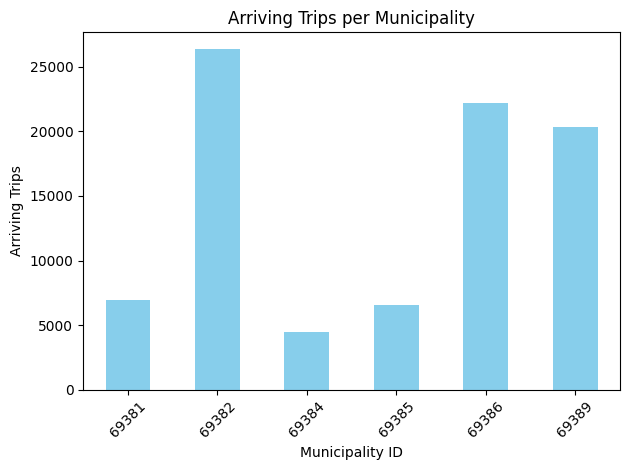

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_employment_Study_Area and total_trips_generated are defined

# Calculate total employment in the study area
total_employment = df_employment_Study_Area['employment'].sum()

# Calculate 70% of total employment
seventy_percent_total_employment = 0.7 * total_employment

# Calculate 70% of total trips generated
seventy_percent_total_trips = 0.7 * total_trips_generated

# Choose the minimum between 70% of total employment and 70% of total trips generated
N = min(seventy_percent_total_employment, seventy_percent_total_trips)

# Calculate arriving trips for each municipality based on their employment and the calculated N
df_employment_Study_Area['arriving_trips'] = (df_employment_Study_Area['employment'] / total_employment) * N

# Plot the results as a bar plot
df_employment_Study_Area.plot(kind='bar', x='municipality_id', y='arriving_trips', legend=False, color='skyblue')
plt.xlabel('Municipality ID')
plt.ylabel('Arriving Trips')
plt.title('Arriving Trips per Municipality')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


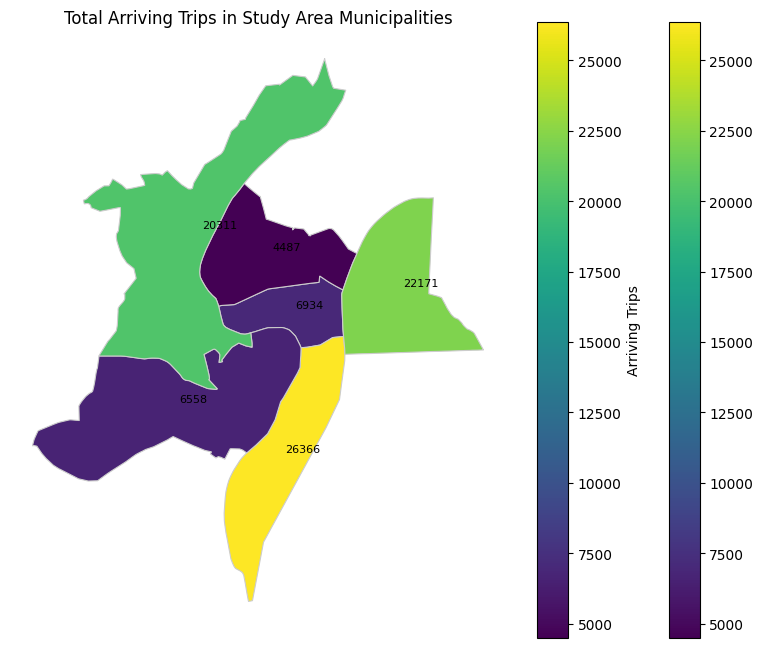

In [58]:
df_merged = df_study_area.merge(df_employment_Study_Area, on='municipality_id')
import matplotlib.pyplot as plt

# Assuming df_merged and its structure are defined as in your example

fig, ax = plt.subplots(figsize=(10, 8))

# Plotting the map
df_merged.plot(column='arriving_trips', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Adding annotations
for idx, row in df_merged.iterrows():
    ax.annotate(text=str(int(row['arriving_trips'])),
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  # Offset text slightly
                textcoords="offset points",
                fontsize=8,
                color="black")

# Adding colorbar
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')
cbar.set_label('Arriving Trips')

# Adjusting legend
ax.set_title('Total Arriving Trips in Study Area Municipalities')
ax.set_axis_off()  # Turn off the axis

plt.show()


In [59]:
new_df_population_study_area['scale_trips'] = new_df_population_study_area['total_trips'] / total_trips_generated * N

C:\Users\aders\AppData\Local\Temp\ipykernel_14628\2331316551.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
new_df_population_study_area['scale_trips']

27273    10860.026824
27274    10425.566225
27276    12957.178797
27277    16784.987841
27278    18576.245416
27281    17226.794898
Name: scale_trips, dtype: float64

# 2.3

In [61]:
municipalities = df_study_area["municipality_id"].unique()

In [62]:
municipalities

array(['69381', '69382', '69384', '69385', '69386', '69389'], dtype=object)

In [63]:
df_municipalities

,municipality_id,geometry,iris_id,department_id
0,01001,"POLYGON ((851129.600 6563369.200, 851107.500 6...",010010000,01
1,01002,"POLYGON ((889113.200 6549307.800, 889111.600 6...",010020000,01
2,01004,"POLYGON ((882936.400 6541364.300, 882932.900 6...",010040102,01
3,01005,"POLYGON ((846758.000 6544007.000, 846755.000 6...",010050000,01
4,01006,"POLYGON ((900682.500 6518954.000, 900466.600 6...",010060000,01
...,...,...,...,...
34873,95676,"POLYGON ((608000.000 6886602.000, 607973.100 6...",956760000,95
34874,95678,"POLYGON ((645264.100 6888152.200, 645279.800 6...",956780000,95
34875,95680,"POLYGON ((656141.900 6877322.900, 656091.200 6...",956800111,95
34876,95682,"POLYGON ((656543.000 6887123.500, 656421.900 6...",956820000,95


In [64]:
import numpy.linalg as la

centroids = df_study_area["geometry"].centroid
centroids = np.array([centroids.x, centroids.y] ).T


distance_matrix = np.zeros((len(municipalities), len(municipalities)))

for k in range(len(municipalities)):    
    distance_matrix[k,:] = la.norm(centroids[k] - centroids, axis = 1)

In [65]:
distance_matrix

array([[   0.        , 2423.21686953, 1058.10164662, 2511.16571911,
        1852.85501782, 2064.43275002],
       [2423.21686953,    0.        , 3408.65456274, 1976.18672902,
        3419.38225314, 4019.28702541],
       [1058.10164662, 3408.65456274,    0.        , 3000.89510069,
        2289.34254654, 1226.95687643],
       [2511.16571911, 1976.18672902, 3000.89510069,    0.        ,
        4242.66365873, 2955.57580704],
       [1852.85501782, 3419.38225314, 2289.34254654, 4242.66365873,
           0.        , 3515.85854184],
       [2064.43275002, 4019.28702541, 1226.95687643, 2955.57580704,
        3515.85854184,    0.        ]])

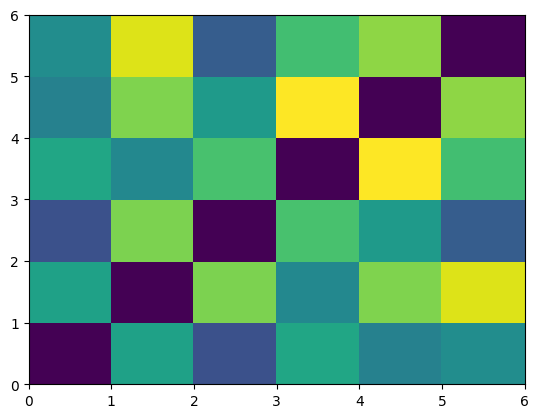

In [66]:
plt.pcolor(distance_matrix)

In [67]:
import numpy as np
# Initialize friction matrix based on the distance matrix
def calculate_friction_matrix(distance_matrix, beta, alpha):
    return np.exp(beta * distance_matrix + alpha)
# Initialize the A_i and B_j factors to 1 for all zones
def initialize_factors(num_A, num_B):
    return np.ones(num_A), np.ones(num_B)

# Update A_i and B_j iteratively until convergence
def update_factors(A_i, B_j, friction_matrix, employment_trips, population_trips, max_iterations=1000, convergence_threshold=1e-6):
    for iteration in range(max_iterations):
        previous_A_i = A_i.copy()
        previous_B_j = B_j.copy()

        # Update A_i
        A_i = 1.0 / (friction_matrix.dot(B_j) * employment_trips)

        # Update B_j
        B_j = 1.0 / (friction_matrix.T.dot(A_i) * population_trips)

        # Check convergence
        if np.all(np.abs(previous_A_i - A_i) < convergence_threshold) and \
           np.all(np.abs(previous_B_j - B_j) < convergence_threshold):
            break
    return A_i, B_j


def calculate_flow_matrix(A_i, B_j, friction_matrix, employment_trips, population_trips):
    return np.outer(A_i * population_trips, B_j * employment_trips) * friction_matrix
beta = -1.1e-4
alpha = -0.4
friction_matrix = calculate_friction_matrix(distance_matrix, beta, alpha)
A_i, B_j = initialize_factors(len(new_df_population_study_area), len(df_employment_Study_Area))
A_i, B_j = update_factors(A_i, B_j, friction_matrix, df_employment_Study_Area['arriving_trips'].values, new_df_population_study_area['scale_trips'].values)
F_ij = calculate_flow_matrix(A_i, B_j, friction_matrix, df_employment_Study_Area['arriving_trips'].values, new_df_population_study_area['scale_trips'].values)
print("Flow Matrix F_ij:")
print(F_ij)


Flow Matrix F_ij:
[[ 1699.60788645  5941.97774401   818.24208742   855.78037445
   2967.03301444  2683.40217786]
 [  351.80145548  2096.06937344   170.72693337   245.26259111
    674.83467054   584.80282799]
 [ 2865.34073462 10097.87262121  1741.02675838  1535.82722583
   5356.06586489  5572.7502301 ]
 [ 2291.72988628 11093.42896477  1174.48914777  2004.96042489
   4054.474633    4324.07101644]
 [  822.77823723  3160.75761558   424.1425729    419.84975005
   2159.17117278  1357.67887624]
 [  797.52551618  2935.63239779   472.97037358   479.89975824
   1455.10878517  1983.02140699]]


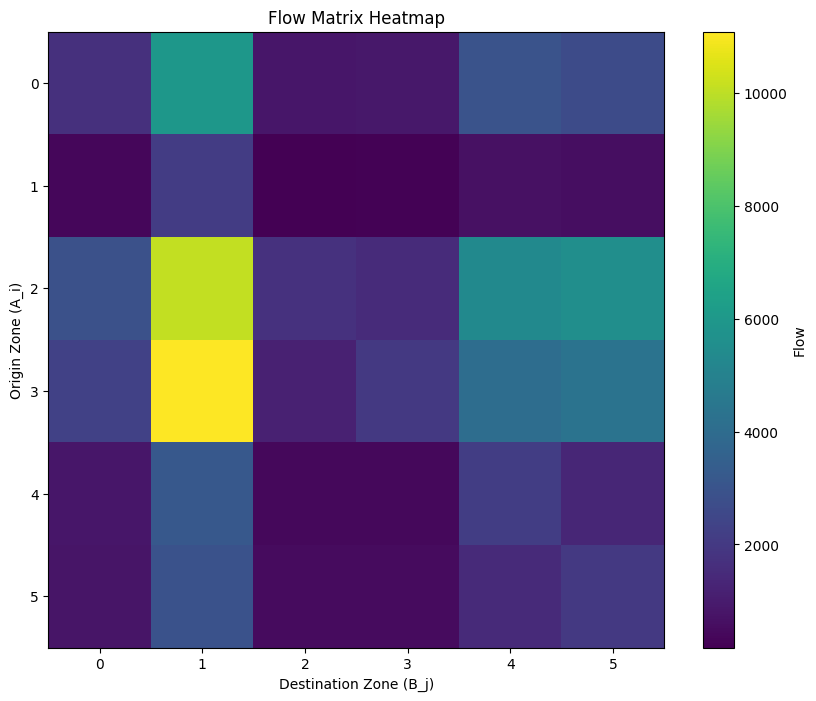

In [68]:
import matplotlib.pyplot as plt

def plot_heatmap(matrix):
    plt.figure(figsize=(10, 8))
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Flow')
    plt.xlabel('Destination Zone (B_j)')
    plt.ylabel('Origin Zone (A_i)')
    plt.title('Flow Matrix Heatmap')
    plt.show()

# Example usage
plot_heatmap(F_ij)

Create F_ij table

In [69]:
row_sums = np.sum(F_ij, axis=1)

col_sums = np.sum(F_ij, axis=0)

total_sum = np.sum(F_ij)

F_ij_table= pd.DataFrame(F_ij)



F_ij_table.index = municipalities

F_ij_table.columns = municipalities

print("Flow Matrix ")

print(F_ij_table.to_string())


Flow Matrix 
             69381         69382        69384        69385        69386        69389
69381  1699.607886   5941.977744   818.242087   855.780374  2967.033014  2683.402178
69382   351.801455   2096.069373   170.726933   245.262591   674.834671   584.802828
69384  2865.340735  10097.872621  1741.026758  1535.827226  5356.065865  5572.750230
69385  2291.729886  11093.428965  1174.489148  2004.960425  4054.474633  4324.071016
69386   822.778237   3160.757616   424.142573   419.849750  2159.171173  1357.678876
69389   797.525516   2935.632398   472.970374   479.899758  1455.108785  1983.021407


In [70]:
# Finding the overall maximum value
overall_max = F_ij_table.values.max()

# Displaying the overall maximum value
print("Overall maximum value:", overall_max)

Overall maximum value: 11093.428964769815


In [71]:
# Finding the overall maximum value
overall_min = F_ij_table.values.min()

# Displaying the overall maximum value
print("Overall minimum value:", overall_min)

Overall minimum value: 170.72693336525475


In [72]:
df_study_area

,municipality_id,geometry,iris_id,department_id
27273,69381,"POLYGON ((842136.800 6520220.200, 842085.300 6...",693810501,69
27274,69382,"POLYGON ((842170.700 6517714.100, 842035.300 6...",693820501,69
27276,69384,"POLYGON ((842184.200 6521046.200, 842154.600 6...",693840402,69
27277,69385,"POLYGON ((840594.000 6518286.300, 840528.900 6...",693850202,69
27278,69386,"POLYGON ((843389.600 6519894.800, 843302.200 6...",693860201,69
27281,69389,"POLYGON ((840253.300 6519501.900, 840246.600 6...",693890502,69


# EX 3

In [73]:
df_flow=pd.DataFrame(F_ij)
df_flow.columns = municipalities
df_flow.index = municipalities
df_flow

,69381,69382,69384,69385,69386,69389
69381,1699.607886,5941.977744,818.242087,855.780374,2967.033014,2683.402178
69382,351.801455,2096.069373,170.726933,245.262591,674.834671,584.802828
69384,2865.340735,10097.872621,1741.026758,1535.827226,5356.065865,5572.750230
69385,2291.729886,11093.428965,1174.489148,2004.960425,4054.474633,4324.071016
69386,822.778237,3160.757616,424.142573,419.849750,2159.171173,1357.678876
69389,797.525516,2935.632398,472.970374,479.899758,1455.108785,1983.021407


In [74]:
df_flow = df_flow.reset_index()
df_new = df_flow.melt(id_vars='index', var_name='destination_id', value_name='weight')


In [75]:
df_new

,index,destination_id,weight
0,69381,69381,1699.607886
1,69382,69381,351.801455
2,69384,69381,2865.340735
3,69385,69381,2291.729886
4,69386,69381,822.778237
5,69389,69381,797.525516
6,69381,69382,5941.977744
7,69382,69382,2096.069373
8,69384,69382,10097.872621
9,69385,69382,11093.428965


In [76]:
df_new.rename(columns={'index': 'origin_id'}, inplace=True)


In [77]:
df_new

,origin_id,destination_id,weight
0,69381,69381,1699.607886
1,69382,69381,351.801455
2,69384,69381,2865.340735
3,69385,69381,2291.729886
4,69386,69381,822.778237
5,69389,69381,797.525516
6,69381,69382,5941.977744
7,69382,69382,2096.069373
8,69384,69382,10097.872621
9,69385,69382,11093.428965


In [78]:
df_new["probability"] = df_new["weight"] / df_new["weight"].sum()

In [79]:
df_new

,origin_id,destination_id,weight,probability
0,69381,69381,1699.607886,0.019386
1,69382,69381,351.801455,0.004013
2,69384,69381,2865.340735,0.032683
3,69385,69381,2291.729886,0.026140
4,69386,69381,822.778237,0.009385
5,69389,69381,797.525516,0.009097
6,69381,69382,5941.977744,0.067777
7,69382,69382,2096.069373,0.023909
8,69384,69382,10097.872621,0.115180
9,69385,69382,11093.428965,0.126536


In [80]:
df_trips = df_new.sample(1000, weights = "probability", replace = True)


In [81]:
df_trips = df_trips[["origin_id", "destination_id"]]
df_trips.head()

,origin_id,destination_id
8,69384,69382
12,69381,69384
26,69384,69386
9,69385,69382
7,69382,69382


In [82]:
df_trips = pd.merge(df_trips, df_municipalities.rename(columns = {
    "municipality_id": "origin_id", "geometry": "origin_geometry"
}), on = "origin_id")

In [83]:
df_trips = pd.merge(df_trips, df_municipalities.rename(columns = {
    "municipality_id": "destination_id", "geometry": "destination_geometry"
}), on = "destination_id")

In [84]:
df_trips = df_trips[["origin_id", "destination_id", "origin_geometry", "destination_geometry"]]

In [85]:
assert len(df_trips) == 1000
df_trips = df_trips.set_geometry("origin_geometry")
df_trips["origin_geometry"] = df_trips.sample_points(1)
df_trips = df_trips.set_geometry("destination_geometry")
df_trips["destination_geometry"] = df_trips.sample_points(1)
df_trips

,origin_id,destination_id,origin_geometry,destination_geometry
0,69384,69382,POINT (840811.486 6521015.012),POINT (842247.019 6519178.539)
1,69384,69382,POINT (841369.354 6522552.518),POINT (842192.061 6518094.533)
2,69384,69382,POINT (841181.695 6521527.890),POINT (841500.216 6516928.854)
3,69384,69382,POINT (841929.119 6521573.155),POINT (841859.169 6517970.762)
4,69384,69382,POINT (842633.922 6521903.566),POINT (841317.750 6517985.412)
...,...,...,...,...
995,69386,69385,POINT (844186.544 6520919.228),POINT (839356.708 6518485.838)
996,69386,69385,POINT (844119.558 6520336.419),POINT (841412.258 6518686.364)
997,69386,69385,POINT (844269.263 6520101.398),POINT (838109.979 6518429.636)
998,69386,69385,POINT (843895.173 6522233.836),POINT (840527.480 6518349.301)


In [86]:
# Import necessary library
import shapely.geometry as sgeo

# Create LineString geometries from pairs of origin and destination points
df_trips["geometry"] = [
    sgeo.LineString((origin, destination)) 
    for origin, destination in zip(df_trips["origin_geometry"], df_trips["destination_geometry"])
]

# Display the DataFrame with the new geometries
df_trips


,origin_id,destination_id,origin_geometry,destination_geometry,geometry
0,69384,69382,POINT (840811.486 6521015.012),POINT (842247.019 6519178.539),"LINESTRING (840811.486 6521015.012, 842247.019..."
1,69384,69382,POINT (841369.354 6522552.518),POINT (842192.061 6518094.533),"LINESTRING (841369.354 6522552.518, 842192.061..."
2,69384,69382,POINT (841181.695 6521527.890),POINT (841500.216 6516928.854),"LINESTRING (841181.695 6521527.890, 841500.216..."
3,69384,69382,POINT (841929.119 6521573.155),POINT (841859.169 6517970.762),"LINESTRING (841929.119 6521573.155, 841859.169..."
4,69384,69382,POINT (842633.922 6521903.566),POINT (841317.750 6517985.412),"LINESTRING (842633.922 6521903.566, 841317.750..."
...,...,...,...,...,...
995,69386,69385,POINT (844186.544 6520919.228),POINT (839356.708 6518485.838),"LINESTRING (844186.544 6520919.228, 839356.708..."
996,69386,69385,POINT (844119.558 6520336.419),POINT (841412.258 6518686.364),"LINESTRING (844119.558 6520336.419, 841412.258..."
997,69386,69385,POINT (844269.263 6520101.398),POINT (838109.979 6518429.636),"LINESTRING (844269.263 6520101.398, 838109.979..."
998,69386,69385,POINT (843895.173 6522233.836),POINT (840527.480 6518349.301),"LINESTRING (843895.173 6522233.836, 840527.480..."


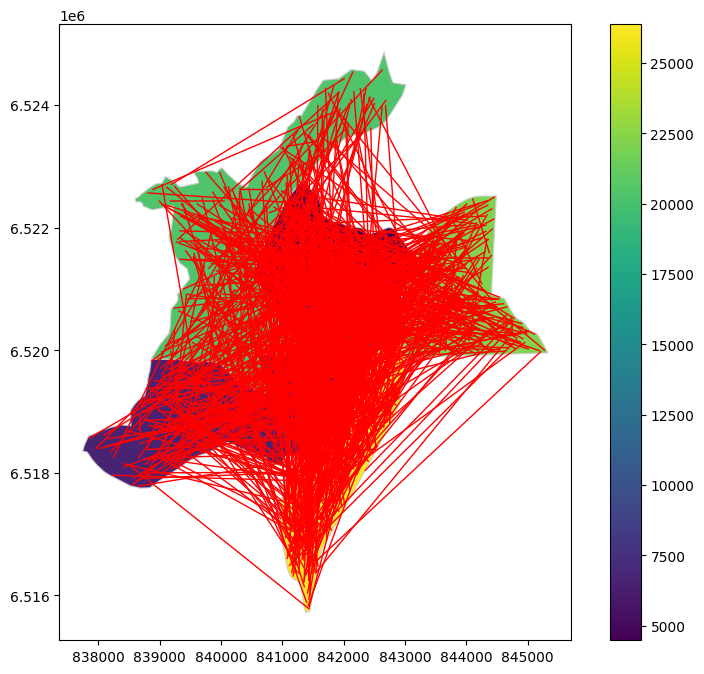

In [87]:
# Merge the study area data with employment data based on municipality_id
merged_data = df_study_area.merge(df_employment_Study_Area, on='municipality_id')

# Create a new figure for the plot with a specified size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the study area, representing arriving trips with a colormap
merged_data.plot(column='arriving_trips', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Convert the trip data to a GeoDataFrame and overlay it on the same plot, highlighting trip routes in red
trip_routes = gpd.GeoDataFrame(df_trips, geometry='geometry')
trip_routes.plot(ax=ax, color='red', linewidth=1)  

# Display the plot
plt.show()


# Histogram

In [88]:
np.random.seed(0)
df_trips["departure_time"] = np.maximum(0.0, np.random.normal(8 * 3600, 3600, size=len(df_trips)))

(array([  3.,   6.,   9.,  11.,  30.,  40.,  59.,  87., 103., 114., 116.,
        123.,  83.,  77.,  48.,  38.,  22.,  16.,  11.,   4.]),
 array([ 4.95385695,  5.24413185,  5.53440676,  5.82468167,  6.11495658,
         6.40523149,  6.6955064 ,  6.9857813 ,  7.27605621,  7.56633112,
         7.85660603,  8.14688094,  8.43715585,  8.72743075,  9.01770566,
         9.30798057,  9.59825548,  9.88853039, 10.1788053 , 10.46908021,
        10.75935511]),
 <BarContainer object of 20 artists>)

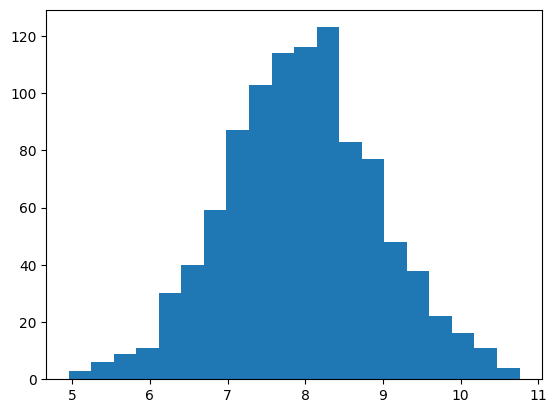

In [89]:
plt.hist(df_trips["departure_time"] / 3600, bins=20)

# CDF

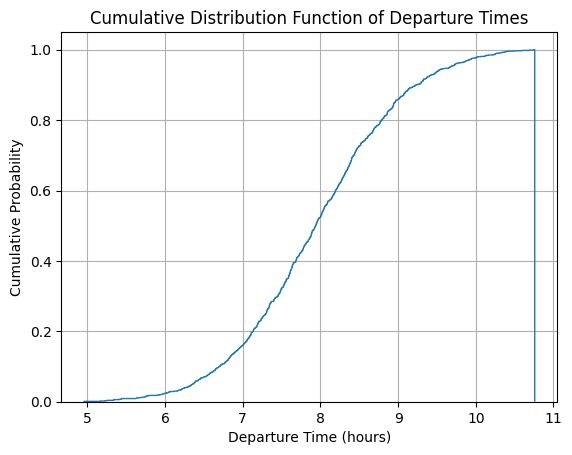

In [90]:


# Setting seed for reproducibility
np.random.seed(0)

# Generating departure times with a normal distribution
mean_departure_time_seconds = 8 * 3600  # 8:00 AM in seconds
departure_times_seconds = np.maximum(0.0, np.random.normal(mean_departure_time_seconds, 3600, size=len(df_trips)))

# Converting departure times from seconds to hours
departure_times_hours = departure_times_seconds / 3600

# Plotting the cumulative distribution function (CDF) of departure times
plt.hist(departure_times_hours, bins=1000, cumulative=True, density=True, histtype='step')
plt.xlabel('Departure Time (hours)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function of Departure Times')
plt.grid(True)
plt.show()
